# Direct methods for Poisson problem
Studying the fill-in phenomenon

In [25]:
import numpy as np
import scipy
import matplotlib.pyplot as plt


def build_poisson_1D(n):
    h = 1 / (n-1)
    
    A = np.zeros((n,n))
    A[0,0] = 1
    A[-1,-1] = 1
    
    for i in range(1,n-1):
        A[i,i-1] = -1 / h*h
        A[i,i]   =  2 / h*h
        A[i,i+1] = -1 / h*h
        
    return A


def display_fillin(A):
    P,L,U = scipy.linalg.lu(A)
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    ax1.spy(L)
    ax1.set_title('L')
    
    ax2.spy(U)
    ax2.set_title('U')
    
    plt.show()

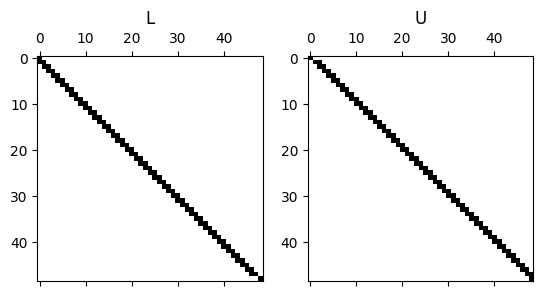

In [26]:
A = build_poisson_1D(49)
display_fillin(A)

In 1D the structure is preserved. Only information about current node, left neighbour and right neighbour is needed

In [27]:
def build_poisson_2D(n):
    h = 1 / (n-1)
    A = np.zeros((n*n, n*n))
    
    for i in range(n*n):
        row = i // n
        col = i % n
        
        if row == 0 or row == n-1 or col == 0 or col == n-1:
            A[i,i] = 1
        else:
            A[i,i]   =  4 / h*h
            A[i,i-1] = -1 / h*h
            A[i,i+1] = -1 / h*h
            A[i+n,i] = -1 / h*h
            A[i-n,i] = -1 / h*h
    
    return A

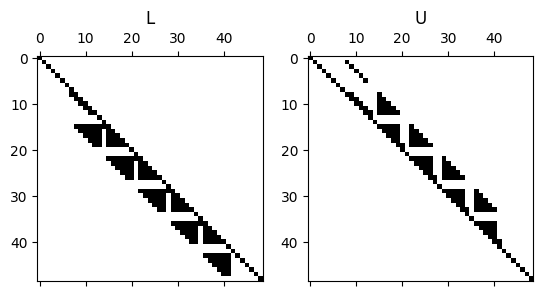

In [28]:
A = build_poisson_2D(7)
display_fillin(A)